List of Imports

In [22]:
import numpy as np
import math
import matplotlib.collections as mc
import matplotlib.pylab as pl
import matplotlib.pyplot as plt

Random Intinerary

In [23]:
random_seed = 1729
np.random.seed(random_seed)
N = 40
x = np.random.rand(N)
y = np.random.rand(N)

In [24]:
points = zip(x, y)
cities = list(points)

itinerary = list(range(0,N))

In [25]:
def genlines(cities, itinerary):
    lines = []
    for j in range(0, len(itinerary) - 1):
        lines.append([cities[itinerary[j]], cities[itinerary[j+1]]])
    return lines

In [26]:
def howfar(lines):
    distance = 0
    for j in range(0, len(lines)):
        distance += math.sqrt(abs(lines[j][1][0] - lines[j][0][0])**2 + \
        abs(lines[j][1][1] - lines[j][0][1])**2)
    return distance

In [27]:
def plotitinerary(cities, itin, plottitle, thename):
    lc = mc.LineCollection(genlines(cities, itin), linewidths=2)
    fig, ax = pl.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    pl.title(plottitle)
    pl.xlabel('X Coordinate')
    pl.ylabel('Y Coordinate')
    pl.savefig(str(thename) + '.png')
    pl.close()

In [28]:
plotitinerary(cities,itinerary,'TSP - Random Itinerary','Random')

Nearest Neighbor

In [29]:
point = [0.5, 0.5]
j = 10
distance = math.sqrt((point[0] - cities[j][0])**2 + (point[1] - cities[j][1])**2)

In [30]:
def findnearest(cities, idx, nnitinerary):
    point = cities[idx]
    mindistance = float('inf')
    minidx = -1
    for j in range(0, len(cities)):
        distance = math.sqrt((point[0] - cities[j][0])**2 + (point[1] - cities[j][1])**2)
        if distance < mindistance and j not in nnitinerary:
            mindistance = distance
            minidx = j
    return minidx

In [31]:
nnitinerary = [0]

def donn(cities, N):
    nnitinerary = [0]
    for j in range(0, N-1):
        next = findnearest(cities, nnitinerary[len(nnitinerary) - 1], nnitinerary)
        nnitinerary.append(next)
    return nnitinerary

In [32]:
plotitinerary(cities,donn(cities,N),'TSP - Nearest Neighbor','NearestNeighbor')

Simulated Annealing

In [33]:
def perturb(cities, itinerary):
    neighborids1 = math.floor(np.random.rand() * len(itinerary))
    neighborids2 = math.floor(np.random.rand() * len(itinerary))
    
    itinerary2 = itinerary.copy()
    
    itinerary2[neighborids1] = itinerary[neighborids2]
    itinerary2[neighborids2] = itinerary[neighborids1]
    
    distance1 = howfar(genlines(cities, itinerary))
    distance2 = howfar(genlines(cities, itinerary2))
    
    itinerarytoreturn = itinerary.copy()
    
    if (distance1 > distance2):
        itinerarytoreturn = itinerary2.copy()
    
    return(itinerarytoreturn.copy())

In [34]:
np.random.seed(random_seed)
itinerary_ps = itinerary.copy()
for n in range(0, len(itinerary) * 50000):
    itinerary_ps = perturb(cities, itinerary_ps)

print(howfar(genlines(cities, itinerary_ps)))

7.37962855396978


In [35]:
temperature = lambda t: 1/(t + 1)

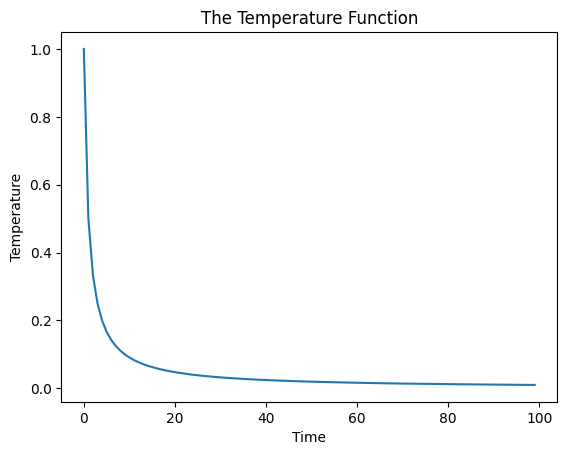

In [36]:
ts = list(range(0, 100))
plt.plot(ts, [temperature(t) for t in ts])
plt.title('The Temperature Function')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

In [37]:
def perturb_sa1(cities, itinerary, time):
    neighborids1 = math.floor(np.random.rand() * len(itinerary))
    neighborids2 = math.floor(np.random.rand() * len(itinerary))
    
    itinerary2 = itinerary.copy()
    
    itinerary2[neighborids1] = itinerary[neighborids2]
    itinerary2[neighborids2] = itinerary[neighborids1]
    
    distance1 = howfar(genlines(cities, itinerary))
    distance2 = howfar(genlines(cities, itinerary2))
    
    itinerarytoreturn = itinerary.copy()
    
    randomdraw = np.random.rand()
    temperature = 1/((time / 1000) + 1)
    
    if ((distance2 > distance1 and (randomdraw) < (temperature))or (distance1 > distance2)):
        itinerarytoreturn = itinerary2.copy()
    
    return(itinerarytoreturn.copy())

In [38]:
def perturb_sa2(cities, itinerary, time):
    neighborids1 = math.floor(np.random.rand() * len(itinerary))
    neighborids2 = math.floor(np.random.rand() * len(itinerary))
    
    itinerary2 = itinerary.copy()
    
    randomdraw2 = np.random.rand()
    small = min(neighborids1, neighborids2)
    big = max(neighborids1, neighborids2)
    if (randomdraw2 >= 0.55):
        itinerary2[small:big] = itinerary2[small:big][::-1]
    elif(randomdraw2 < 0.45):
        tempitin = itinerary2[small:big]
        del(itinerary2[small:big])

    neighborids3 = math.floor(np.random.rand() * len(itinerary))
    for j in range(0, len(tempitin)):
        itinerary2.insert(neighborids3 + j, tempitin[j])
    else:
        itinerary2[neighborids1] = itinerary[neighborids2]
        itinerary2[neighborids2] = itinerary[neighborids1]

    distance1 = howfar(genlines(cities, itinerary))
    distance2 = howfar(genlines(cities, itinerary2))

    itinerarytoreturn = itinerary.copy()

    randomdraw = np.random.rand()
    temperature = 1/((time / 1000) + 1)

    if((distance2 > distance1 and (randomdraw) < (temperature)) or (distance1 > distance2)):
        itinerarytoreturn = itinerary2.copy()

    if((distance2 > distance1 and randomdraw < temperature) or (distance1 > distance2)):
        scale = 3.5
    
    if ((distance2 > distance1 and (randomdraw) < (temperature * scale)) or (distance1 > distance2)):
        scale = 3.5
    
    if((distance2 > distance1 and (randomdraw)) < (math.exp(scale * (distance1 - distance2))* temperature) or (distance1 > distance2)):
        itinerarytoreturn = itinerary2.copy()
    
    return (itinerarytoreturn.copy())

In [39]:
def perturb_sa3(cities, itinerary, time, maxitin):
    neighborids1 = math.floor(np.random.rand() * len(itinerary))
    neighborids2 = math.floor(np.random.rand() * len(itinerary))
    global mindistance
    global minitinerary
    global minidx
    itinerary2 = itinerary.copy()
    randomdraw = np.random.rand()
    
    randomdraw2 = np.random.rand()
    small = min(neighborids1, neighborids2)
    big = max(neighborids1, neighborids2)
    if (randomdraw2 >= 0.55):
        itinerary2[small:big] = itinerary2[small:big][::-1]
    elif(randomdraw2 < 0.45):
        tempitin = itinerary2[small:big]
        del(itinerary2[small:big])
        neighborids3 = math.floor(np.random.rand() * len(itinerary))
        for j in range(0, len(tempitin)):
            itinerary2.insert(neighborids3 + j, tempitin[j])
    else:
        itinerary2[neighborids1] = itinerary[neighborids2]
        itinerary2[neighborids2] = itinerary[neighborids1]
        
    temperature = 1/(time / (maxitin/10) + 1)
    
    distance1 = howfar(genlines(cities, itinerary))
    distance2 = howfar(genlines(cities, itinerary2))
    
    itinerarytoreturn = itinerary.copy()
    
    scale = 3.5
    if((distance2 > distance1 and (randomdraw)) < (math.exp(scale * (distance1 - distance2))* temperature) or (distance1 > distance2)):
        itinerarytoreturn = itinerary2.copy()
    
    reset = True
    resetthresh = 0.04
    if (reset and (time - minidx) > (maxitin * resetthresh)):
        itinerarytoreturn = minitinerary
        minidx = time
    
    if(howfar(genlines(cities, itinerarytoreturn)) < mindistance):
        mindistance = howfar(genlines(cities, itinerarytoreturn))
        minitinerary = itinerarytoreturn
        minidx = time
    
    if (abs(time-maxitin) <= 1):
        itinerarytoreturn = minitinerary.copy()
        
    return (itinerarytoreturn.copy())

In [40]:
def siman(itinerary, cities):
    newitinerary = itinerary.copy()
    global mindistance
    global minitinerary
    global minidx
    mindistance = howfar(genlines(cities, itinerary))
    minitinerary = itinerary
    minidx = 0
    
    maxitin = len(itinerary) * 50000
    for t in range(0, maxitin):
        newitinerary = perturb_sa3(cities, newitinerary, t, maxitin)
    
    return (newitinerary.copy())

In [41]:
np.random.seed(random_seed)
itinerary = list(range(N))
nnitin = donn(cities, N)
nnresult = howfar(genlines(cities, nnitin))
simanitinerary = siman(itinerary, cities)
simanresult = howfar(genlines(cities, simanitinerary))
print(nnresult)
print(simanresult)
print(simanresult/nnresult)

6.29000579854535
5.324726648610248
0.8465376375076895


In [42]:
plotitinerary(cities,simanitinerary,'Traveling Salesman Itinerary - Simulated Annealing','SimulatedAnnealing')